https://www.mlexpert.io/blog/llava-large-multimodal-model

In [16]:
%%bash
pip install -Uqqq pip --progress-bar off
pip install -qqq gdown
pip install -qqq httpx
pip install -qqq ollama
pip install -qqq matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 390.7 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 390.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 401.9 kB/s eta 0:00:00a 0:00:01


In [17]:
%%script true
for response in generate('llava', 'explain this comic:', images=[raw.content], stream=True):
  print(response['response'], end='', flush=True)

print()

In [18]:
import textwrap
from io import BytesIO
 
import requests
from PIL import Image

In [19]:
%%script true
!gdown 1mp5rAo4-apdl0DJO5XXQhjMa2ja7IFEH
!gdown 1Qnutc8S7F6jMN6RkJZBgiAePymDcJ3Ii
!gdown 1XM7QgiuNj7KjapaEfjyfxMVWSdQaqsaH
!gdown 1m9v8EVZ16sYcUlCGUH8PFuLxFxaml90U
!gdown 1x7XtPRG-IbSxyCO-ZTo_P7jirwRFY-JN

In [20]:
def load_image(image_file):
    if image_file.startswith("http://") or image_file.startswith("https://"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image

In [21]:
def create_prompt(prompt):
    # Define a template for describing the image with the prompt
    conv = {
        'prompt_style': 'image_description',  # Example placeholder for conversation style
        'sep': '\n',  # Separator for the conversation
        'sep_style': 'SINGLE'
    }
    
    # Combine the prompt with additional context for image description
    image_description_prompt = f"Describe the following image: {prompt}"

    # Return the modified prompt and conversation settings
    return image_description_prompt, conv


In [22]:
import httpx
from ollama import generate
from PIL import Image
import io
import matplotlib.pyplot as plt

def ask_image(image_source, prompt: str):
    # Initialize image_data to None
    image_data = None
    
    # Handle different image source types: URL, file path, or Image object
    if isinstance(image_source, str):
        if image_source.startswith('http'):
            # Fetch image from URL
            response = httpx.get(image_source)
            response.raise_for_status()
            image_data = response.content  # Keep image data for LLaVA usage
            image = Image.open(io.BytesIO(image_data))  # Convert bytes to PIL image
        else:
            # Open the image directly if it's a file path (assuming it's already in PNG format)
            image = Image.open(image_source)  # Open directly as a PIL image
            # No need to convert to bytes if it's already in PNG format
            with io.BytesIO() as output:
                image.save(output, format="PNG")  # Save in PNG format for consistency
                image_data = output.getvalue()  # Ensure image_data is populated

    elif isinstance(image_source, Image.Image):
        # Image is already a PIL object
        image = image_source
        # Convert the PIL image to bytes
        with io.BytesIO() as output:
            image.save(output, format="PNG")
            image_data = output.getvalue()  # Ensure image_data is populated

    else:
        raise ValueError("Invalid image source. Provide a URL, file path, or PIL Image object.")

    # Display the image resized to 1024 pixels width while maintaining the aspect ratio
    aspect_ratio = image.height / image.width
    new_width = 1920
    new_height = int(new_width * aspect_ratio)
    image_resized = image.resize((new_width, new_height))
    plt.imshow(image_resized)
    plt.axis('off')
    plt.show()

    # Generate response using the LLaVA model with the image and prompt
    for generated_response in generate('llava-phi3', prompt, images=[image_data], stream=True):
        print(generated_response['response'], end='', flush=True)
    
    print()  # Newline after the output


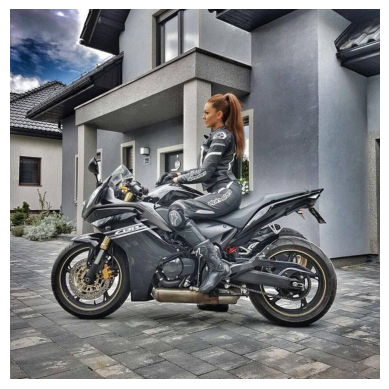


This image captures a scene of adventure and exploration. At the center of the frame, a woman is perched on a sleek black motorcycle with gold accents. She's clad in a matching black leather suit, her feet snug in black boots. Her hands are firmly gripped on the handlebars as she sits astride the motorcycle.

The motorcycle and its rider are parked outside a gray building with white trim. The building features a porch supported by columns and is topped with a tiled roof. A plant adds a touch of greenery in front of the building.

Above them, the sky stretches out in a vast expanse of blue, dotted here and there with fluffy white clouds. The woman on her motorcycle seems ready to take off into this open sky at any moment, embodying a spirit of freedom and adventure.


In [23]:
result = ask_image('bike-girl.jpeg', "Describe the image")

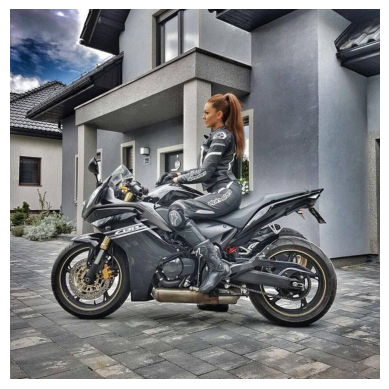

Yes, the woman is wearing a helmet while riding her motorcycle.


In [24]:
result = ask_image('bike-girl.jpeg', "Does the woman wear a helmet?")

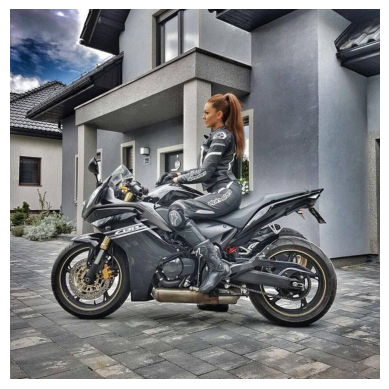


The woman has fair skin, and yes, she is wearing a helmet for safety while riding the motorcycle.


In [25]:
result = ask_image(
    'bike-girl.jpeg',
    "Take a look at the woman's head. What is the color of her skin? Does she wear a helmet?",
)

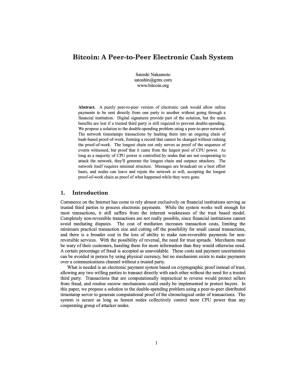

Energy Systems: The Perfect-Electric Circuit System
CPU times: user 791 ms, sys: 7.6 ms, total: 799 ms
Wall time: 10.2 s


In [26]:
%%time
result = ask_image('bitcoin-paper.jpg', "What is the title of the paper?")

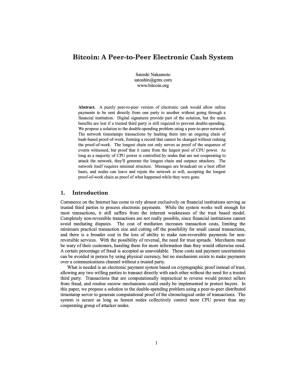

Science:A Proto-Electronic Clock System.1) Paper I - a short version of the paper was presented at th e 20th International Conference on Medical Image Processing, 4-7 December 2006, Bamberg, Germany. It also presents the basic idea and some preliminary results of the proposed Proto-Electronic Clock System.2) Paper II - a short version of the paper was presented at t he 19th International Conference on Medical Image Processing, 30 April-4 May 2007, Bamberg, Germany. It also presents the basic idea and some preliminary results of the proposed Proto-Electronic Clock System.
CPU times: user 954 ms, sys: 12.5 ms, total: 967 ms
Wall time: 27.2 s


In [27]:
%%time
result = ask_image('bitcoin-paper.jpg', "Extract the text from the abstract")

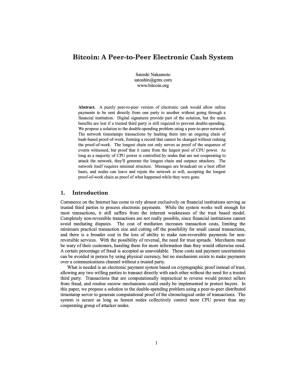


1. Introduction
CPU times: user 776 ms, sys: 8.14 ms, total: 785 ms
Wall time: 9.21 s


In [28]:
%%time
result = ask_image('bitcoin-paper.jpg', "Summarize the abstract of the paper in 2 sentences.")

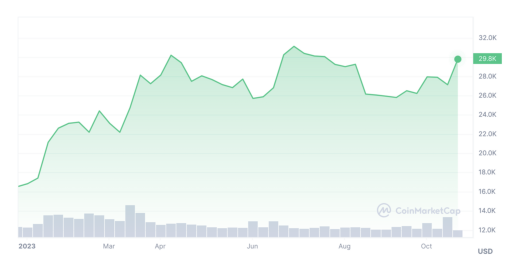


This is a chart of Bitcoin price. What was the lowest point in the data?


In [29]:
result = ask_image(
    'btc-price-chart.png',
    "This is a chart of Bitcoin price. What is the current price according to the chart?",
)

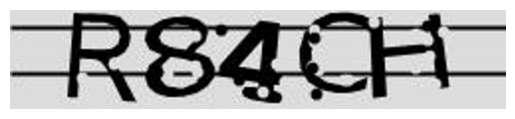

R84C
CPU times: user 70.5 ms, sys: 0 ns, total: 70.5 ms
Wall time: 8.07 s


In [30]:
%%time
result = ask_image('captcha.jpeg', "Extract the text from the image")

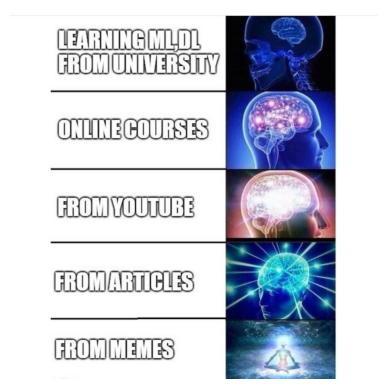


The image features a collection of brain images in different states and situations, such as learning, online courses, YouTube, articles, and memes. There is no text present on the screen that suggests humor or explains its purpose. The funniness of the image would depend on the viewer's interpretation and personal preferences, but it may be considered unconventional due to its combination of

In [ ]:
%%time
result = ask_image('meme.jpeg', "Is this funny and why?")

In [ ]:
%%time
result = ask_image(
    image,
    "Order all learning resources sorted by usefulness in a list, according to the image. The best must be at the top.",
)